# 듣는 중 빅데이터 분석 (9주차) 11월4일
> CNN 세부내용

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [CNN, feature extraction]

### import 

In [3]:
import torch 
import matplotlib.pyplot as plt 

### 컨볼루션 

#### 컨볼루션 연산 

`-` 아래는 (5,5) 이미지에 (3,3) 커널을 적용하여 컨볼루션을 수행한 결과이다. 

![](https://github.com/guebin/2021BDA/blob/master/_notebooks/2021-11-04-conv.png?raw=true)

- https://arxiv.org/abs/1603.07285

`-` 위의 연산을 구현하면 아래와 같다. 

In [4]:
img = torch.Tensor([[3.0, 3.0, 2.0, 1.0, 0.0],
                    [0.0, 0.0, 1.0, 3.0, 1.0],
                    [3.0, 1.0, 2.0, 2.0, 3.0],
                    [2.0, 0.0, 0.0, 2.0, 2.0],
                    [2.0, 0.0, 0.0, 0.0, 1.0]])

In [5]:
img.shape

torch.Size([5, 5])

아래 reshape 안 취해주면 에러가 뜬다.  1 observation 1 chennal 

In [6]:
img=img.reshape(1,1,5,5) 

In [7]:
conv=torch.nn.Conv2d(in_channels=1,out_channels=1, kernel_size=(3,3), bias=False) 

In [8]:
conv.weight

Parameter containing:
tensor([[[[ 0.0217, -0.0667,  0.1019],
          [ 0.2479,  0.2325, -0.2041],
          [ 0.2590,  0.2724,  0.1134]]]], requires_grad=True)

위의 imgage에서 표의 진한 부분에서 오른쪽 아래 있는 것들 입력한 것!

In [9]:
conv.weight.data = torch.Tensor([[[[0.0, 1.0, 2.0], 
                                   [2.0, 2.0, 0.0],
                                   [0.0, 1.0, 2.0]]]])                                   

In [10]:
conv.weight

Parameter containing:
tensor([[[[0., 1., 2.],
          [2., 2., 0.],
          [0., 1., 2.]]]], requires_grad=True)

In [11]:
conv(img)

tensor([[[[12., 12., 17.],
          [10., 17., 19.],
          [ 9.,  6., 14.]]]], grad_fn=<ThnnConv2DBackward0>)

- 현재는 입력채널이 1개 출력채널이 1개인 경우이다. 
- 입력채널이 3개인경우 (3,3) 커널이 3개 필요하다. 
- 입력채널이 3개이고 출력채널이 16개인 경우라면 (3,3) 커널이 48개(3$\times 16$) 필요하다. 

#### 특징추출기능 (feature extraction) 

`-` 컨볼루션연산은 커널의 계수값에 따라서 이미지의 특징을 추출하는 역할을 하는데 그것을 알아보기 위해 아래와 같이 Conv2d 층을 하나 생성하자. 

In [12]:
conv = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=2, bias=False)

`-` 필터값확인 

In [13]:
conv.weight

Parameter containing:
tensor([[[[ 0.3047,  0.2079],
          [-0.0800, -0.0205]]],


        [[[ 0.1961, -0.3685],
          [-0.0205, -0.4432]]]], requires_grad=True)

`-` 필터값을 내가 원하는 값으로 변경 

In [14]:
conv.weight.data= torch.Tensor([[[[0.25, 0.25], 
                                  [0.25, 0.25]]],
                                [[[-1.0,1.0],
                                  [-1.0,1.0]]]])

- 첫번째 필터는 평균필터, 두번째 필터는 엣지검출필터 

1/4(=0.25)를 2 $]times$ 2 에서 각각 곱해 더해주니까. 엣지 검출 필터는 뒤에서 앞을 뺴준다는 개념으로 접근해보자 경계선 검출해주는 역할

`-` 입력데이터 생성 (단순한 흑백대비)

In [ ]:
img = torch.Tensor([[.1, .1, .1, .0, .0, .0],
                    [.1, .1, .1, .0, .0, .0],
                    [.1, .1, .1, .0, .0, .0],
                    [.1, .1, .1, .0, .0, .0],
                    [.1, .1, .1, .0, .0, .0],
                    [.1, .1, .1, .0, .0, .0]]).reshape(1,1,6,6)

In [ ]:
img

tensor([[[[0.1000, 0.1000, 0.1000, 0.0000, 0.0000, 0.0000],
          [0.1000, 0.1000, 0.1000, 0.0000, 0.0000, 0.0000],
          [0.1000, 0.1000, 0.1000, 0.0000, 0.0000, 0.0000],
          [0.1000, 0.1000, 0.1000, 0.0000, 0.0000, 0.0000],
          [0.1000, 0.1000, 0.1000, 0.0000, 0.0000, 0.0000],
          [0.1000, 0.1000, 0.1000, 0.0000, 0.0000, 0.0000]]]])

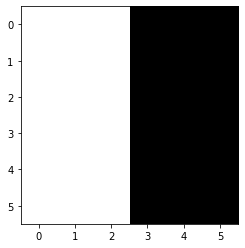

In [ ]:
plt.imshow(img.squeeze(),cmap='gray')

`-` 입력이미지에 컨볼루션 적용 

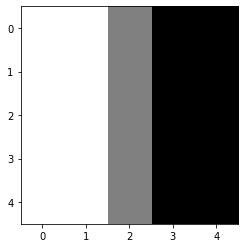

In [ ]:
plt.imshow(conv(img)[0][0].data,cmap='gray')

- 첫번째 필터를 적용한 결과 

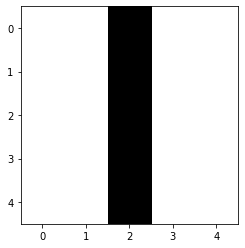

In [ ]:
plt.imshow(conv(img)[0][1].data,cmap='gray') 

`-` 요약 

- 커널의 계수에 따라서 엣지를 검출하는 필터가 만들어지기도 하고, 스무딩을 하는 필터가 만들어지기도 한다. 
- 이들을 조합하면 다양한 특징을 검출할 수 있다. 


#### 패딩, 스트라이드 

`-` 패딩: 이미지의 가장자리에 적당한 값(예를들면 0)을 넣고 커널연산을 수행. 그래서 컨볼루션 연산 이후에도 이미지의 크기가 줄어들지 않도록 방지.

`-` 스트라이드: 윈도우가 1칸씩 이동하는 것이 아니라 2~3칸씩 이동함 (이미지 축소효과) 

### CNN 아키텍처의 표현방법 

`-` 왜 풀링을 하는가? 이미지를 줄이고 싶어서. 

`-` 아래와 같이 아키텍처의 형태로 표현하고 굳이 이미지를 그리지않음 (출처: 위키피디아)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/1920px-Comparison_image_neural_networks.svg.png)

### 배치노말라이제이션 (아키텍처레벨의 컨트롤) 

- ref: https://www.google.com/search?q=deep+learning+ian+goodfellow&biw=1119&bih=707&tbm=bks&sxsrf=AOaemvJfbtYOtnqia8NXVzJ03G1m-NuukQ%3A1635986386747&ei=0iuDYbP-LInT-QbphZXABQ&oq=Deep+Learning+i&gs_l=psy-ab.3.0.0i19k1.10636.13294.0.14233.4.3.1.0.0.0.166.447.0j3.3.0....0...1c.1j4.64.psy-ab..0.4.451....0.dDa1TpYCPMs

`-` 원래 목적은 최적화의 개선으로 개발된 방법이다. 역전파에 의해 발생하는 2~3차 사이드 이펙을 캔슬한다. (미분값을 잘 계산하기 위한 알고리즘) 

`-` 하지만 부수적으로 과적합을 피하는 효과도 있다 (그래서 종종 드랍아웃을 쓸 필요가 없어진다.) 

`-` 생각보다 어려운 개념이다. 그냥 이런것이 있다는 것 정도만 알아둘것 

### discussion about CNN 

`-` 격자형태로 배열된 자료를 처리하는데 특화된 신경망이다. 
- 시계열 (1차원 격자), 이미지(2차원 격자) 

`-` 신경과학의 원리가 심층학습에 영향을 미친 사례 

#### 모티브 

`-` 회소성 + 매개변수 공유 

- 희소성: 이미지를 분석하여 특징을 뽑아낼 떄 부분부분의 특징만 뽑으면 된다는 의미 
- 매개변수공유: 한 채널에는 하나의 역할을 하는 커널을 설계하면 된다는 의미 (스무딩이든 엣징이든). 즉 어떤지역은 스무딩, 어떤 지역은 엣징을 할 필요없이 한 채널은 모두 스무딩, 다른 채널은 모두 엣징만 하고 여러채널을 고려하여 이미지를 이해하면 된다는 의미 

`-` 당연한 소리같지만 위의 원리로 인해서 파라메터 감소효과가 엄청남 

(예시) (1,6,6) $\to$ (2,5,5) 
- MLP 방식이라면 $36\times 50$의 파라메터가 필요함 
- CNN은 8개 

(예시) (3,244,244) $\to$ (16,224,244) 

#### 신경망의 구조 

`-` 컨볼루션 - 활성화 - 풀링 

`-` 풀링: 요약의 의미 
- 요약을 굳이 왜 하는가? 어차피 결국 $y=0$ 아니면 $y=1$ 이니까 줄이긴 줄여야 함
- 요약을 하나도 안하고 있다가 나중에 한번에 하려면 힘들어요 
